# Image Classification Model Deployment - CNN

**Raynold Panji Zulfiandi**

> Emotion Detection

> Dataset: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer

In [5]:
# %tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.6.4


In [6]:
# cek penggunaan GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
else:
  print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


2022-10-06 17:51:44.736698: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-06 17:51:44.804176: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-06 17:51:44.898987: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-06 17:51:44.899849: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

# Data Preparation

### Download Dataset (Google collbs)

In [3]:
!pip install -q kaggle
from google.colab import files 

# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raynoldpanji","key":"b99496bfa41cc4ec5d25a40027b9c1fa"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d ananthu017/emotion-detection-fer


 83% 54.0M/65.2M [00:00<00:00, 172MB/s]

100% 65.2M/65.2M [00:00<00:00, 165MB/s]


In [6]:
# !rm -rf datasets
!ls 

emotion-detection-fer.zip  kaggle.json	sample_data


In [7]:
!mkdir datasets
!unzip -q emotion-detection-fer.zip -d datasets
!ls datasets

test  train


### Download Datasets (kaggle notebook)

In [7]:
# !rm -rf datasets
!ls -al

total 16
drwxr-xr-x 3 root root 4096 Oct  6 17:51 .
drwxr-xr-x 5 root root 4096 Oct  6 17:51 ..
drwxr-xr-x 2 root root 4096 Oct  6 17:51 .virtual_documents
---------- 1 root root  263 Oct  6 17:51 __notebook_source__.ipynb


In [8]:
!mkdir ./datasets
!cp -r ../input/emotion-detection-fer/* ./datasets
!ls -al datasets

total 16
drwxr-xr-x 4 root root 4096 Oct  6 17:52 .
drwxr-xr-x 4 root root 4096 Oct  6 17:51 ..
drwxr-xr-x 9 root root 4096 Oct  6 17:52 test
drwxr-xr-x 9 root root 4096 Oct  6 17:54 train


In [9]:
!chmod 777 ./datasets/train
!chmod 777 ./datasets/test

!ls datasets/test

angry  disgusted  fearful  happy  neutral  sad	surprised


# Data Cleansing

In [10]:
import os

TRAINING_DIR = 'datasets/train/'
VALIDATION_DIR = 'datasets/test/'

os.listdir(TRAINING_DIR), os.listdir(VALIDATION_DIR)

(['surprised', 'disgusted', 'fearful', 'angry', 'sad', 'happy', 'neutral'],
 ['surprised', 'disgusted', 'fearful', 'angry', 'sad', 'happy', 'neutral'])

In [11]:
## cek jumlah dataset
def jum_data():
  train = []
  val = []
  lists = os.listdir(TRAINING_DIR)
  for cls in lists:
    train.append(len(os.listdir(os.path.join(TRAINING_DIR, cls))))
  for cls in lists:
    val.append(len(os.listdir(os.path.join(VALIDATION_DIR, cls))))
  return train, val, lists

def cek_data():
  chs = []
  train, val, lists = jum_data()
  
  msg="\n======================================"
  for i, cls in enumerate(lists):
    tot = train[i]+val[i]
    ch = round(tot*0.8)
    chs.append(ch-train[i])
    percen = ": "+str(80)+"% dari total ✓✓" if (ch==train[i]) else "-"
    msg=msg+f"\ntotal {cls}\t: {train[i]} ===> {ch} {percen}"
  msg=msg+"\ntotal : "+str(sum(train))
  
  msg=msg+"\n======================================"
  for i, cls in enumerate(lists):
    tot = train[i]+val[i]
    percen = ": "+str(20)+"% dari total ✓✓" if (round(tot*0.2)==val[i]) else "-"
    msg=msg+f"\ntotal {cls}\t: {val[i]} ===> {round(tot*0.2)} {percen}"
  msg=msg+"\ntotal : "+str(sum(val))

  msg=msg+"\n======================================"
  return msg, chs

print(cek_data()[0])
print(cek_data()[1])


total surprised	: 3171 ===> 3202 -
total disgusted	: 436 ===> 438 -
total fearful	: 4097 ===> 4097 : 80% dari total ✓✓
total angry	: 3995 ===> 3962 -
total sad	: 4830 ===> 4862 -
total happy	: 7215 ===> 7191 -
total neutral	: 4965 ===> 4958 -
total : 28709
total surprised	: 831 ===> 800 -
total disgusted	: 111 ===> 109 -
total fearful	: 1024 ===> 1024 : 20% dari total ✓✓
total angry	: 958 ===> 991 -
total sad	: 1247 ===> 1215 -
total happy	: 1774 ===> 1798 -
total neutral	: 1233 ===> 1240 -
total : 7178
[31, 2, 0, -33, 32, -24, -7]


In [12]:
## hapus folder disgusted
import shutil
shutil.rmtree(os.path.join(TRAINING_DIR, 'disgusted') )
shutil.rmtree(os.path.join(VALIDATION_DIR, 'disgusted'))

os.listdir(TRAINING_DIR), os.listdir(VALIDATION_DIR)
print(cek_data()[0])
print(cek_data()[1])


total surprised	: 3171 ===> 3202 -
total fearful	: 4097 ===> 4097 : 80% dari total ✓✓
total angry	: 3995 ===> 3962 -
total sad	: 4830 ===> 4862 -
total happy	: 7215 ===> 7191 -
total neutral	: 4965 ===> 4958 -
total : 28273
total surprised	: 831 ===> 800 -
total fearful	: 1024 ===> 1024 : 20% dari total ✓✓
total angry	: 958 ===> 991 -
total sad	: 1247 ===> 1215 -
total happy	: 1774 ===> 1798 -
total neutral	: 1233 ===> 1240 -
total : 7067
[31, 0, -33, 32, -24, -7]


In [13]:
## pindahkan train test gambar agar sesuai kriteria 80/20

import random 

for i, dir in enumerate(jum_data()[2]):
  source = None
  dest = None

  if (cek_data()[1][i])<0:
    source = os.path.join(TRAINING_DIR, dir)
    dest = os.path.join(VALIDATION_DIR, dir)
  elif cek_data()[1][i]>0:
    source = os.path.join(VALIDATION_DIR, dir)
    dest = os.path.join(TRAINING_DIR, dir)
  
  if source==None:
    continue
  print("\n"+source+" ====> "+dest)
  files = os.listdir(source)

  for file_name in random.sample(files, abs(cek_data()[1][i])):
    shutil.move(os.path.join(source, file_name), os.path.join(dest, "mov_"+file_name))
    print(file_name+" moved")



datasets/test/surprised ====> datasets/train/surprised
im697.png moved
im236.png moved
im707.png moved
im310.png moved
im355.png moved
im363.png moved
im173.png moved
im665.png moved
im77.png moved
im251.png moved
im530.png moved
im582.png moved
im496.png moved
im172.png moved
im790.png moved
im222.png moved
im715.png moved
im199.png moved
im508.png moved
im120.png moved
im467.png moved
im45.png moved
im733.png moved
im383.png moved
im585.png moved
im518.png moved
im457.png moved
im760.png moved
im592.png moved
im109.png moved
im726.png moved

datasets/train/angry ====> datasets/test/angry
im2625.png moved
im1891.png moved
im2018.png moved
im1042.png moved
im3229.png moved
im3819.png moved
im287.png moved
im1803.png moved
im2318.png moved
im571.png moved
im749.png moved
im680.png moved
im192.png moved
im3905.png moved
im1435.png moved
im2499.png moved
im2452.png moved
im2817.png moved
im2533.png moved
im1187.png moved
im3300.png moved
im2849.png moved
im425.png moved
im3610.png moved


In [14]:
print(cek_data()[0])
print(cek_data()[1])


total surprised	: 3202 ===> 3202 : 80% dari total ✓✓
total fearful	: 4097 ===> 4097 : 80% dari total ✓✓
total angry	: 3962 ===> 3962 : 80% dari total ✓✓
total sad	: 4862 ===> 4862 : 80% dari total ✓✓
total happy	: 7191 ===> 7191 : 80% dari total ✓✓
total neutral	: 4958 ===> 4958 : 80% dari total ✓✓
total : 28272
total surprised	: 800 ===> 800 : 20% dari total ✓✓
total fearful	: 1024 ===> 1024 : 20% dari total ✓✓
total angry	: 991 ===> 991 : 20% dari total ✓✓
total sad	: 1215 ===> 1215 : 20% dari total ✓✓
total happy	: 1798 ===> 1798 : 20% dari total ✓✓
total neutral	: 1240 ===> 1240 : 20% dari total ✓✓
total : 7068
[0, 0, 0, 0, 0, 0]


In [15]:
## Undersampling class happy

avg_undersampling = (sum(jum_data()[0]) / len(jum_data()[0])) / 7191  # persentase 0.6553

train_happy = 7191 - round(7191 * avg_undersampling)  # total train - 65,53% dari total train data: 4712
val_happy = 1798 - round(1798 * avg_undersampling)    # total val - 65,53% dari total val data: 1178

train_dir = os.path.join(TRAINING_DIR, 'happy')
val_dir = os.path.join(VALIDATION_DIR, 'happy')

for i, file_name in enumerate(random.sample(os.listdir(train_dir), train_happy)):
  os.remove(os.path.join(train_dir, file_name))
print(str(train_happy)+" files removed ")

for i, file_name in enumerate(random.sample(os.listdir(val_dir), val_happy)):
  os.remove(os.path.join(val_dir, file_name))
print(str(val_happy)+" files removed ")

2479 files removed 
620 files removed 


In [16]:
print(cek_data()[0])
print(cek_data()[1])


total surprised	: 3202 ===> 3202 : 80% dari total ✓✓
total fearful	: 4097 ===> 4097 : 80% dari total ✓✓
total angry	: 3962 ===> 3962 : 80% dari total ✓✓
total sad	: 4862 ===> 4862 : 80% dari total ✓✓
total happy	: 4712 ===> 4712 : 80% dari total ✓✓
total neutral	: 4958 ===> 4958 : 80% dari total ✓✓
total : 25793
total surprised	: 800 ===> 800 : 20% dari total ✓✓
total fearful	: 1024 ===> 1024 : 20% dari total ✓✓
total angry	: 991 ===> 991 : 20% dari total ✓✓
total sad	: 1215 ===> 1215 : 20% dari total ✓✓
total happy	: 1178 ===> 1178 : 20% dari total ✓✓
total neutral	: 1240 ===> 1240 : 20% dari total ✓✓
total : 6448
[0, 0, 0, 0, 0, 0]


In [17]:
## Undersampling class sad, happy, dan neutral
train_sampling = ((4958 + 4862 + 4712) // 3) - (3962 + 3202 + 4097) // 3  # rata2 data train yg besar - rata2 train yg kecil: 1091
val_sampling = ((1240 + 1215 + 1178) // 3) - (991 + 800 + 1024) // 3    # rata2 data val yg besar - rata2 val yg kecil: 273

# remove sebagian data pada data happy, neutral, dan sad
for u_dir in ['happy', 'neutral', 'sad']:
  train_dir = os.path.join(TRAINING_DIR, u_dir)
  val_dir = os.path.join(VALIDATION_DIR, u_dir)
  for i, file_name in enumerate(random.sample(os.listdir(train_dir), round(train_sampling))):
    os.remove(os.path.join(train_dir, file_name))
    continue
  print(f"{i+1} train {u_dir} files removed ")
  for i, file_name in enumerate(random.sample(os.listdir(val_dir), round(val_sampling))):
    os.remove(os.path.join(val_dir, file_name))
    continue
  print(f"{i+1} val {u_dir} files removed ")

1091 train happy files removed 
273 val happy files removed 
1091 train neutral files removed 
273 val neutral files removed 
1091 train sad files removed 
273 val sad files removed 


In [18]:
print(cek_data()[0])
print(cek_data()[1])


total surprised	: 3202 ===> 3202 : 80% dari total ✓✓
total fearful	: 4097 ===> 4097 : 80% dari total ✓✓
total angry	: 3962 ===> 3962 : 80% dari total ✓✓
total sad	: 3771 ===> 3770 -
total happy	: 3621 ===> 3621 : 80% dari total ✓✓
total neutral	: 3867 ===> 3867 : 80% dari total ✓✓
total : 22520
total surprised	: 800 ===> 800 : 20% dari total ✓✓
total fearful	: 1024 ===> 1024 : 20% dari total ✓✓
total angry	: 991 ===> 991 : 20% dari total ✓✓
total sad	: 942 ===> 943 -
total happy	: 905 ===> 905 : 20% dari total ✓✓
total neutral	: 967 ===> 967 : 20% dari total ✓✓
total : 5629
[0, 0, 0, -1, 0, 0]


In [19]:
source = os.path.join(TRAINING_DIR, 'sad')
dest = os.path.join(VALIDATION_DIR, 'sad')
file = random.sample(os.listdir(source), 1)[0]

shutil.move(os.path.join(source, file), os.path.join(dest, "mov_"+file))
# print(os.path.join(source, file))

print(cek_data()[0])
print(cek_data()[1])


total surprised	: 3202 ===> 3202 : 80% dari total ✓✓
total fearful	: 4097 ===> 4097 : 80% dari total ✓✓
total angry	: 3962 ===> 3962 : 80% dari total ✓✓
total sad	: 3770 ===> 3770 : 80% dari total ✓✓
total happy	: 3621 ===> 3621 : 80% dari total ✓✓
total neutral	: 3867 ===> 3867 : 80% dari total ✓✓
total : 22519
total surprised	: 800 ===> 800 : 20% dari total ✓✓
total fearful	: 1024 ===> 1024 : 20% dari total ✓✓
total angry	: 991 ===> 991 : 20% dari total ✓✓
total sad	: 943 ===> 943 : 20% dari total ✓✓
total happy	: 905 ===> 905 : 20% dari total ✓✓
total neutral	: 967 ===> 967 : 20% dari total ✓✓
total : 5630
[0, 0, 0, 0, 0, 0]


In [20]:
## backup datasets
!mkdir ./datasets/backup
!cp -r ./datasets/{train,test} ./datasets/backup
!ls -al ./datasets/backup

total 16
drwxr-xr-x 4 root root 4096 Oct  6 17:55 .
drwxr-xr-x 5 root root 4096 Oct  6 17:55 ..
drwxr-xr-x 8 root root 4096 Oct  6 17:55 test
drwxr-xr-x 8 root root 4096 Oct  6 17:55 train


In [21]:
## hapus class surprised dan fearful
shutil.rmtree(os.path.join(TRAINING_DIR, 'surprised') )
shutil.rmtree(os.path.join(VALIDATION_DIR, 'surprised'))

shutil.rmtree(os.path.join(TRAINING_DIR, 'neutral'))
shutil.rmtree(os.path.join(VALIDATION_DIR, 'neutral'))

shutil.rmtree(os.path.join(TRAINING_DIR, 'fearful'))
shutil.rmtree(os.path.join(VALIDATION_DIR, 'fearful'))

print(cek_data()[0])
print(cek_data()[1])


total angry	: 3962 ===> 3962 : 80% dari total ✓✓
total sad	: 3770 ===> 3770 : 80% dari total ✓✓
total happy	: 3621 ===> 3621 : 80% dari total ✓✓
total : 11353
total angry	: 991 ===> 991 : 20% dari total ✓✓
total sad	: 943 ===> 943 : 20% dari total ✓✓
total happy	: 905 ===> 905 : 20% dari total ✓✓
total : 2839
[0, 0, 0]


In [22]:
## Undersampling class angry
train_sampling = (sum(jum_data()[0]) / len(jum_data()[0]))*0.2
val_sampling = (sum(jum_data()[1]) / len(jum_data()[1]))*0.2

for u_dir in ['angry', 'sad', 'happy']:
  train_dir = os.path.join(TRAINING_DIR, u_dir)
  val_dir = os.path.join(VALIDATION_DIR, u_dir)
  for i, file_name in enumerate(random.sample(os.listdir(train_dir), round(train_sampling))):
    os.remove(os.path.join(train_dir, file_name))
    continue
  print(f"{round(train_sampling)} train {u_dir} files removed ")
  for i, file_name in enumerate(random.sample(os.listdir(val_dir), round(val_sampling))):
    os.remove(os.path.join(val_dir, file_name))
    continue
  print(f"{round(val_sampling)} val {u_dir} files removed ")

print(cek_data()[0])
print(cek_data()[1])

757 train angry files removed 
189 val angry files removed 
757 train sad files removed 
189 val sad files removed 
757 train happy files removed 
189 val happy files removed 

total angry	: 3205 ===> 3206 -
total sad	: 3013 ===> 3014 -
total happy	: 2864 ===> 2864 : 80% dari total ✓✓
total : 9082
total angry	: 802 ===> 801 -
total sad	: 754 ===> 753 -
total happy	: 716 ===> 716 : 20% dari total ✓✓
total : 2272
[1, 1, 0]


In [23]:
source = os.path.join(VALIDATION_DIR, 'sad')
dest = os.path.join(TRAINING_DIR, 'sad')
file = random.sample(os.listdir(source), 1)[0]

shutil.move(os.path.join(source, file), os.path.join(dest, "mov_"+file))
# print(os.path.join(source, file))

source = os.path.join(VALIDATION_DIR, 'angry')
dest = os.path.join(TRAINING_DIR, 'angry')
file = random.sample(os.listdir(source), 1)[0]

shutil.move(os.path.join(source, file), os.path.join(dest, "mov_"+file))
# print(os.path.join(source, file))

print(cek_data()[0])
print(cek_data()[1])


total angry	: 3206 ===> 3206 : 80% dari total ✓✓
total sad	: 3014 ===> 3014 : 80% dari total ✓✓
total happy	: 2864 ===> 2864 : 80% dari total ✓✓
total : 9084
total angry	: 801 ===> 801 : 20% dari total ✓✓
total sad	: 753 ===> 753 : 20% dari total ✓✓
total happy	: 716 ===> 716 : 20% dari total ✓✓
total : 2270
[0, 0, 0]


In [69]:
## Undersampling class angry
train_sampling = (jum_data()[0][0] - (sum(jum_data()[0][1:3]) / len(jum_data()[0][1:3])))  
val_sampling = (jum_data()[1][0] - (sum(jum_data()[1][1:3]) / len(jum_data()[1][1:3])))    

train_dir = os.path.join(TRAINING_DIR, 'angry')
val_dir = os.path.join(VALIDATION_DIR, 'angry')
for i, file_name in enumerate(random.sample(os.listdir(train_dir), round(train_sampling))):
  os.remove(os.path.join(train_dir, file_name))
print(f"{train_sampling} train {'angry'} files removed ")
for i, file_name in enumerate(random.samprint(cek_data()[0])
print(cek_data()[1])ple(os.listdir(val_dir), round(val_sampling))):
  os.remove(os.path.join(val_dir, file_name))
print(f"{val_sampling} val {'angry'} files removed ")

266.5 train angry files removed 
67.0 val angry files removed 


In [70]:
print(cek_data()[0])
print(cek_data()[1])


total angry	: 3696 ===> 3696 : 80% dari total ✓✓
total sad	: 3770 ===> 3770 : 80% dari total ✓✓
total happy	: 3621 ===> 3621 : 80% dari total ✓✓
total : 11087
total angry	: 924 ===> 924 : 20% dari total ✓✓
total sad	: 943 ===> 943 : 20% dari total ✓✓
total happy	: 905 ===> 905 : 20% dari total ✓✓
total : 2772
[0, 0, 0]


In [ ]:
## Undersampling class sad, happy, dan neutral
train_sampling = (sum(jum_data()[0][0:3]) / len(jum_data()[0][0:3])) - jum_data()[0][3]  # rata2 sad, happy, neutral - total data train angry: 882
val_sampling = (sum(jum_data()[1][0:3]) / len(jum_data()[1][0:3])) - jum_data()[1][3]    # rata2 sad, happy, neutral - total data val angry: 220

for u_dir in ['sad', 'happy', 'neutral']:
  train_dir = os.path.join(TRAINING_DIR, u_dir)
  val_dir = os.path.join(VALIDATION_DIR, u_dir)
  for i, file_name in enumerate(random.sample(os.listdir(train_dir), round(train_sampling))):
    os.remove(os.path.join(train_dir, file_name))
  print(f"{train_sampling} train {u_dir} files removed ")
  for i, file_name in enumerate(random.sample(os.listdir(val_dir), round(val_sampling))):
    os.remove(os.path.join(val_dir, file_name))
  print(f"{val_sampling} val {u_dir} files removed ")

In [ ]:
print(cek_data()[0])
print(cek_data()[1])

In [ ]:
source = os.path.join(VALIDATION_DIR, 'neutral')
dest = os.path.join(TRAINING_DIR, 'neutral')
file = random.sample(os.listdir(source), 1)[0]

shutil.move(os.path.join(source, file), os.path.join(dest, "mov_"+file))
# print(os.path.join(source, file))

print(cek_data()[0])
print(cek_data()[1])

# Data Preprocessing

In [24]:
## Augmentasi data

from keras.preprocessing.image import ImageDataGenerator
training_datagen = ImageDataGenerator(
    rescale = 1./255.,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip = True,
    fill_mode='nearest',
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,  
)

img_size = 128
batch_size = 45

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR, 
    class_mode='categorical', 
    target_size=(img_size, img_size), 
    batch_size=batch_size,
#     color_mode='grayscale'
)

validation_generator = validation_datagen.flow_from_directory(      
    VALIDATION_DIR,    
    class_mode='categorical',
    target_size=(img_size, img_size),
    batch_size=batch_size,
#     color_mode='grayscale'
)

Found 9084 images belonging to 3 classes.
Found 2270 images belonging to 3 classes.


In [25]:
train_generator.class_indices

{'angry': 0, 'happy': 1, 'sad': 2}

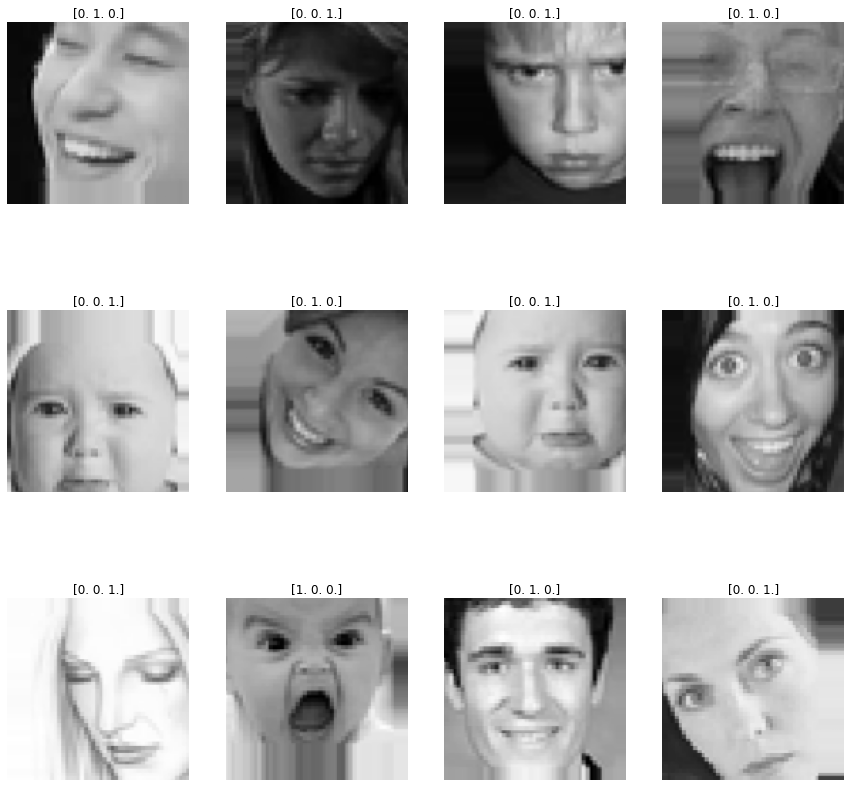

In [26]:
## Plot gambar

import numpy as np
import matplotlib.pylab as plt

plt.figure(figsize=[15,15])
for i in range(12):
    x, y = random.choice(train_generator)
    plt.subplot(3, 4, i+1)
    for im, lb in zip(x, y):
        plt.title(str(lb))
#         plt.imshow(im.reshape(img_size, img_size))
        plt.imshow(im)
        plt.axis('off')
plt.show()

# Training

In [38]:
# conv_base = tf.keras.applications.ResNet50(include_top=False, input_shape=(img_size, img_size, 3), weights='imagenet')
conv_base = tf.keras.applications.ResNet152V2(include_top=False, input_shape=(img_size, img_size, 3), weights='imagenet')
# conv_base = tf.keras.applications.InceptionResNetV2(include_top=False, input_shape=(img_size, img_size, 3), weights='imagenet')

conv_base.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 66, 66, 64)   0           conv1_conv[0][0]                 
________________________________________________________________________________________

In [51]:
## Frezze sebagian layer
for layer in conv_base.layers[:-1]:
  layer.trainable = False


## build architecture
num_cls = len(train_generator.class_indices)

model = tf.keras.models.Sequential([
  conv_base,

  tf.keras.layers.Conv2D(258,(3,3), padding="same", activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.MaxPooling2D(2,2),
  
  tf.keras.layers.Flatten(),
  
#   tf.keras.layers.Dense(512, activation="relu", use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
  tf.keras.layers.Dense(512, activation="relu", use_bias=True),
  tf.keras.layers.Dropout(0.3),
    
  tf.keras.layers.Dense(128, activation="relu", use_bias=True),
  tf.keras.layers.Dropout(0.2),
  
  tf.keras.layers.Dense(num_cls, activation="softmax")
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 4, 4, 2048)        58331648  
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 258)         4755714   
_________________________________________________________________
dropout_15 (Dropout)         (None, 4, 4, 258)         0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 2, 258)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1032)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               528896    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)              

In [52]:
## define callbacks

early_stopping = tf.keras.callbacks.EarlyStopping(
  monitor = "val_accuracy",
  patience = 10,
  verbose = 0,
  mode = "auto",
  restore_best_weights=True
)

callbacks = [early_stopping]

In [53]:
## compile model
epochs = 100
lr = 0.01
decay_rate = lr / epochs
momentum=0.2

opt_adam = tf.optimizers.Adam(learning_rate=lr)
opt_rms = tf.optimizers.RMSprop(learning_rate=lr)
opt_sgd_par = tf.optimizers.SGD(learning_rate=lr, decay=decay_rate, momentum=momentum)
opt_sgd = tf.optimizers.SGD(learning_rate=lr)

model.compile(
  loss = 'categorical_crossentropy',
  optimizer = opt_sgd,
  metrics = ['accuracy']
)


## Train model

STEP_PER_EPOCH = train_generator.n // train_generator.batch_size
VALIDATION_STEPS = validation_generator.n // validation_generator.batch_size

with tf.device(device_name):
  history = model.fit(
      train_generator,
      steps_per_epoch = STEP_PER_EPOCH,
      epochs = epochs,
      validation_data = validation_generator,
      validation_steps = VALIDATION_STEPS,
      verbose = 1,
      callbacks = callbacks
  )

Epoch 1/100
201/201 [==============================] - 55s 235ms/step - loss: 0.2083 - accuracy: 0.9307 - val_loss: 0.7220 - val_accuracy: 0.7902
Epoch 2/100
201/201 [==============================] - 44s 221ms/step - loss: 0.1749 - accuracy: 0.9365 - val_loss: 0.7544 - val_accuracy: 0.7898
Epoch 3/100
201/201 [==============================] - 44s 218ms/step - loss: 0.1773 - accuracy: 0.9335 - val_loss: 0.7362 - val_accuracy: 0.7902
Epoch 4/100
201/201 [==============================] - 44s 219ms/step - loss: 0.1612 - accuracy: 0.9383 - val_loss: 0.7655 - val_accuracy: 0.7916
Epoch 5/100
201/201 [==============================] - 44s 219ms/step - loss: 0.1698 - accuracy: 0.9347 - val_loss: 0.7760 - val_accuracy: 0.7938
Epoch 6/100
201/201 [==============================] - 44s 218ms/step - loss: 0.1666 - accuracy: 0.9369 - val_loss: 0.7634 - val_accuracy: 0.7951
Epoch 7/100
201/201 [==============================] - 45s 221ms/step - loss: 0.1732 - accuracy: 0.9346 - val_loss: 0.7338 -

In [54]:
## model evaluate

loss, acc = model.evaluate(validation_generator)
print(f"valid accuracy: {acc} \nvalid loss: {loss}")

51/51 [==============================] - 4s 83ms/step - loss: 0.7393 - accuracy: 0.7956
valid accuracy: 0.7955946922302246 
valid loss: 0.7392916083335876


# Evaluation Model

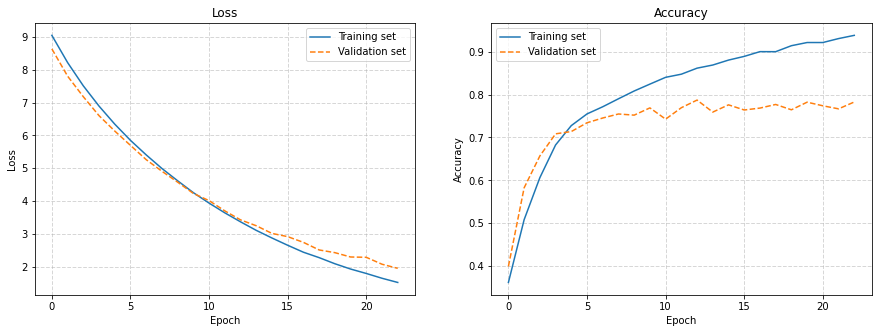

In [32]:
## Plot accuracy dan Loss

loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(loss, label='Training set')
plt.plot(val_loss, label='Validation set', linestyle='--')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(acc, label='Training set')
plt.plot(val_acc, label='Validation set', linestyle='--')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.show()

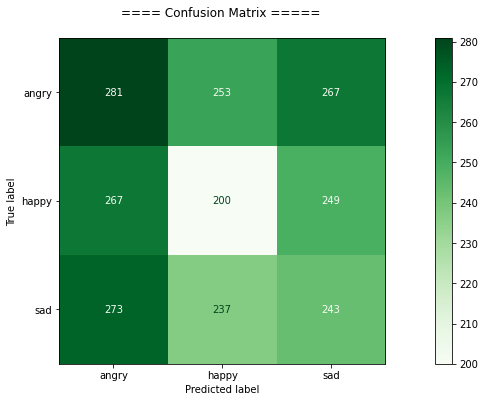


=============== Classification Report ================
              precision    recall  f1-score   support

       angry       0.34      0.35      0.35       801
       happy       0.29      0.28      0.28       716
         sad       0.32      0.32      0.32       753

    accuracy                           0.32      2270
   macro avg       0.32      0.32      0.32      2270
weighted avg       0.32      0.32      0.32      2270



In [33]:
## Plot Confusion Matrix dan Classification Report

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

labels_list = list(train_generator.class_indices.keys())


fig, ax = plt.subplots(figsize=(18, 6))
cm = confusion_matrix(validation_generator.classes, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_list)
disp.plot(cmap=plt.cm.Greens, ax=ax)
plt.title("==== Confusion Matrix ===== \n")
plt.show()


print("\n=============== Classification Report ================")
print(classification_report(validation_generator.classes, y_pred, target_names=labels_list))

# Deployment

In [ ]:
## save model keras *.h5

if os.path.exists('model')==False:
  os.mkdir('model')

model.save_weights("model/model_weights.h5")
model.save("model/model.h5")

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Convert Model keras ke tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

## save model *.tflite
with open('model/model.tflite', 'wb') as f:
  f.write(tflite_model)